In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

C:\Users\nolan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Importing the Dataset and Reorienting It

In [2]:
nhea_1960_2018 = pd.read_csv('NHE18_Summary.csv')

In [3]:
nhea_1960_2018 = nhea_1960_2018.set_index('Year')

In [4]:
nhea_1960_2018 = nhea_1960_2018.transpose()

In [5]:
nhea_1960_2018.head()

Year,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),1U.S. Bureau of the Census. Census resident-based population less armed forces overseas and population of outlying areas.,"2U.S. Department of Commerce, Bureau of Economic Analysis.",NOTE: Numbers and percents may not add to totals because of rounding. Dollar amounts shown are in current dollars.,"SOURCE: Centers for Medicare & Medicaid Services, Office of the Actuary, National Health Statistics Group; U.S. Department of Commerce, Bureau of Economic Analysis; and U.S. Bureau of the Census."
1960,1960,27.2,24.7,23.3,1.1,0.4,2.5,186.2,542.4,NaN,...,133,125,6,2,13,5,NaN,NaN,NaN,NaN
1961,1961,29.1,26.3,24.8,1.2,0.4,2.8,189.2,562.2,7.1,...,139,131,6,2,15,5.2,NaN,NaN,NaN,NaN
1962,1962,31.8,28.4,26.7,1.3,0.5,3.4,192,603.9,9.3,...,148,139,7,2,18,5.3,NaN,NaN,NaN,NaN
1963,1963,34.6,30.9,29.1,1.3,0.5,3.7,194.8,637.5,8.6,...,159,149,7,3,19,5.4,NaN,NaN,NaN,NaN
1964,1964,38.4,34.1,32,1.5,0.6,4.3,197.4,684.5,11,...,173,162,8,3,22,5.6,NaN,NaN,NaN,NaN


### Removing the ,s from the numbers and making the floats

In [6]:
# Converting the columns to a string, removing the ,s from the numbers, and reconverting them to floats.
nhea_1960_2018['National Health Expenditures (Amount in Billions)'] = nhea_1960_2018['National Health Expenditures (Amount in Billions)'].astype(str)
nhea_1960_2018['National Health Expenditures (Amount in Billions)'] = nhea_1960_2018['National Health Expenditures (Amount in Billions)'].str.replace(',', '')
nhea_1960_2018['National Health Expenditures (Amount in Billions)'] = nhea_1960_2018['National Health Expenditures (Amount in Billions)'].astype(float)
nhea_1960_2018['U.S. Population1 (Millions)'] = nhea_1960_2018['U.S. Population1 (Millions)'].astype(str)
nhea_1960_2018['U.S. Population1 (Millions)'] = nhea_1960_2018['U.S. Population1 (Millions)'].str.replace(',', '')
nhea_1960_2018['U.S. Population1 (Millions)'] = nhea_1960_2018['U.S. Population1 (Millions)'].astype(float)

In [7]:
# No commas here, so just need to make it a float
nhea_1960_2018['National Health Expenditures (Annual Percent Change) '] = nhea_1960_2018['National Health Expenditures (Annual Percent Change) '].astype(float)

### Droping the first year for percent change reasons

In [8]:
# nhea_1960_2018 = nhea_1960_2018.iloc[1:]

### Making the cell worth graphing

In [9]:
# Converting the cost collumn to millions for simplicity sake
nhea_1960_2018['National Health Expenditures (Amount in Millions)'] = nhea_1960_2018['National Health Expenditures (Amount in Billions)'] * 1000

In [10]:
# Making the cost per person row
nhea_1960_2018['Healthcare Cost Per Person'] = nhea_1960_2018['National Health Expenditures (Amount in Millions)'] / nhea_1960_2018['U.S. Population1 (Millions)']

### Graaaaaaphs!

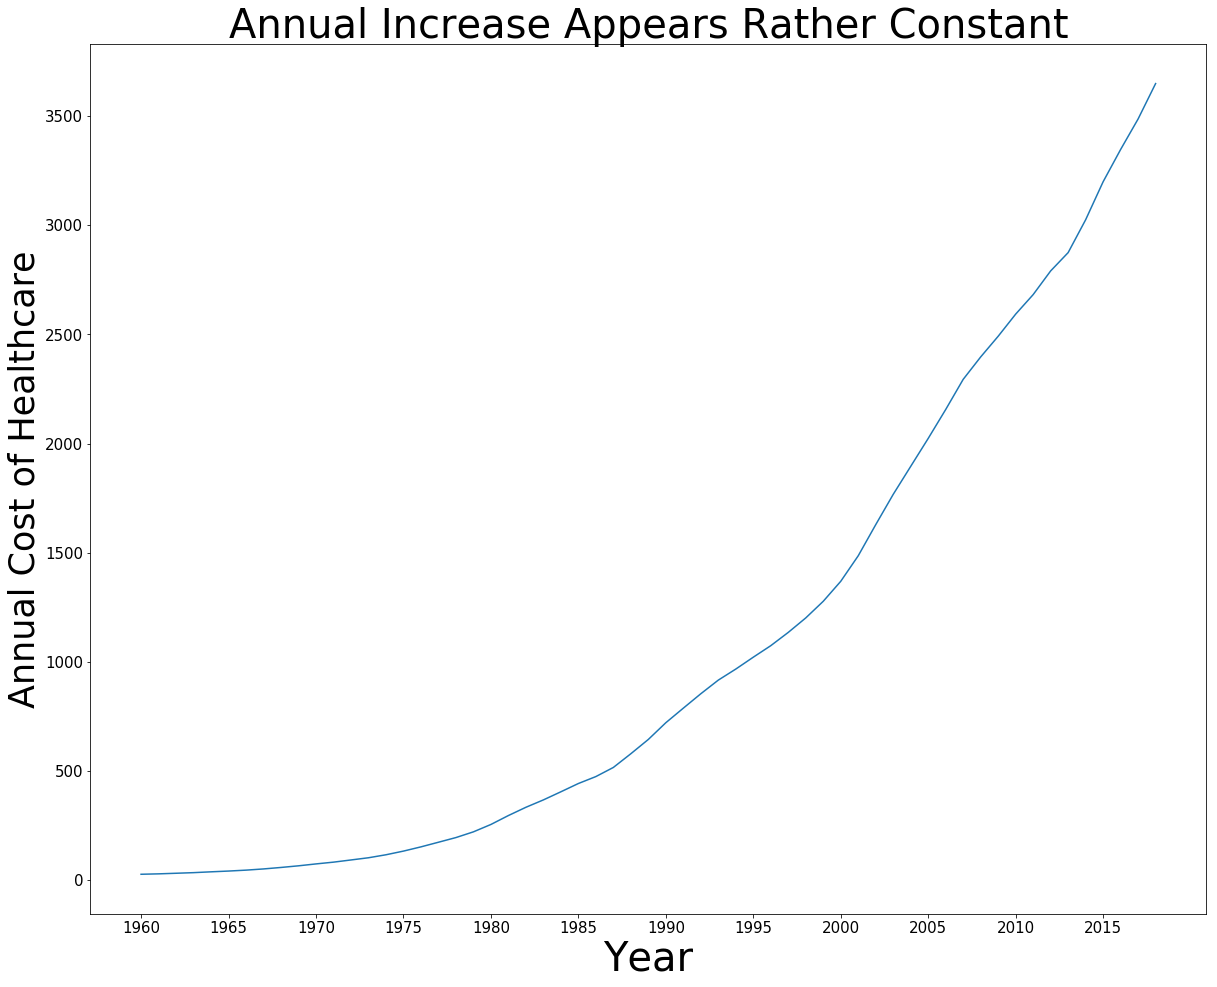

In [70]:
plt.figure(figsize=(20,16))

sns.lineplot(nhea_1960_2018['Year'], nhea_1960_2018['National Health Expenditures (Amount in Billions)'])

plt.title('Annual Increase Appears Rather Constant', fontsize=40)

plt.ylabel('Annual Cost of Healthcare', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks(
    [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);

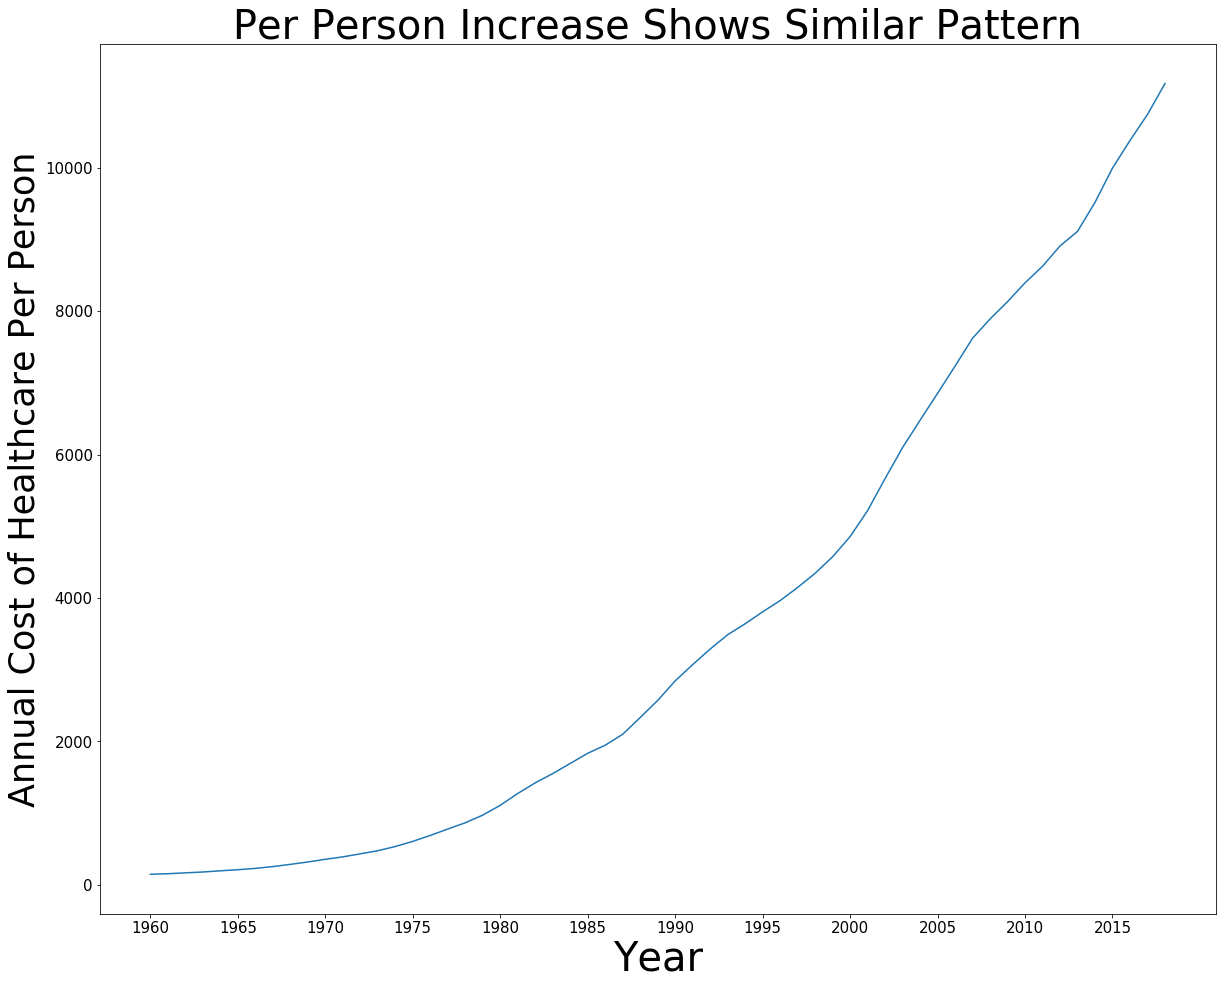

In [69]:
plt.figure(figsize=(20,16))

sns.lineplot(nhea_1960_2018['Year'], nhea_1960_2018['Healthcare Cost Per Person'])

plt.title('Per Person Increase Shows Similar Pattern', fontsize=40)

plt.ylabel('Annual Cost of Healthcare Per Person', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks(
    [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);

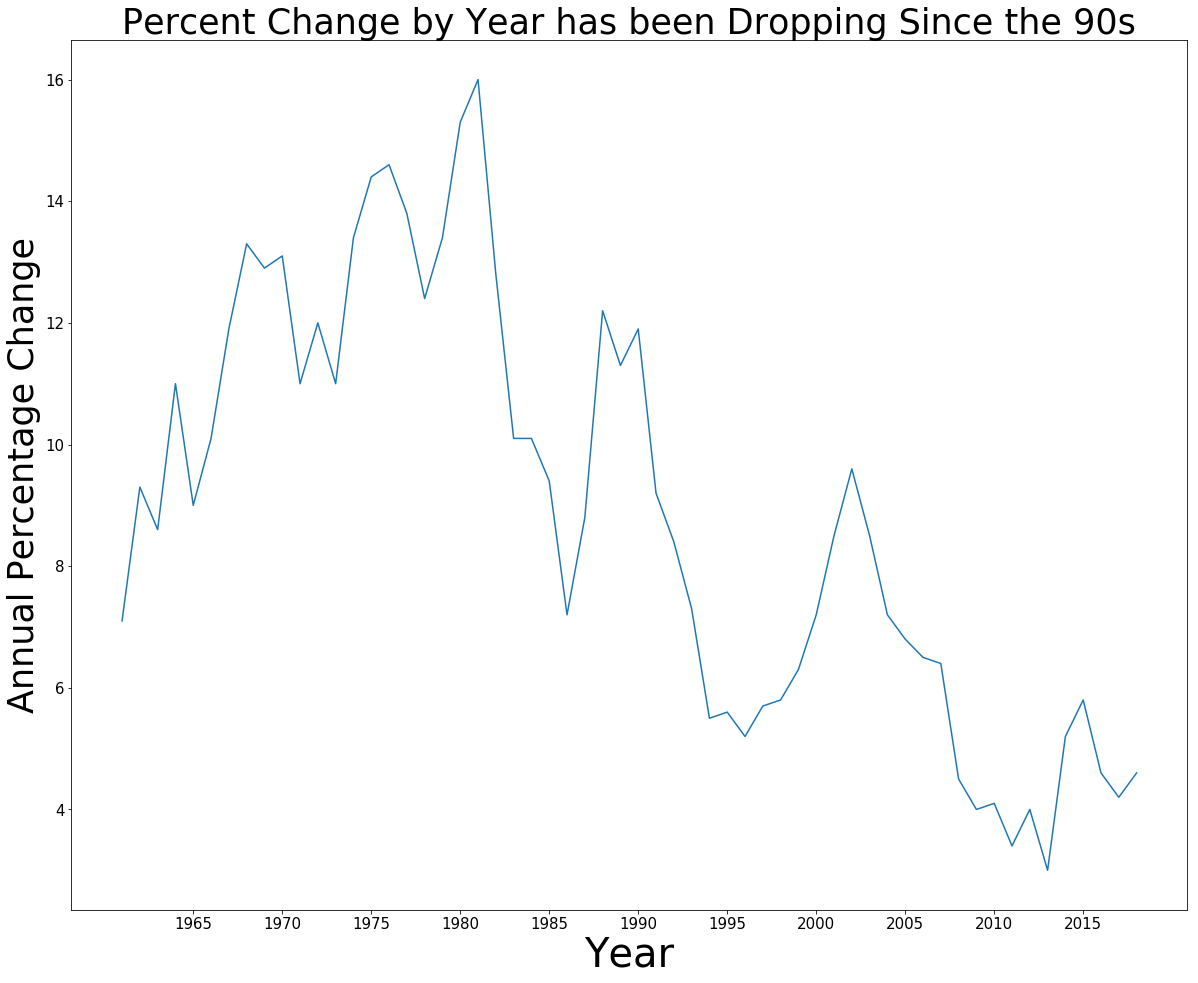

In [71]:
plt.figure(figsize=(20,16))

sns.lineplot(nhea_1960_2018['Year'], nhea_1960_2018['National Health Expenditures (Annual Percent Change) '])

plt.title('Percent Change by Year has been Dropping Since the 90s', fontsize=35)

plt.ylabel('Annual Percentage Change', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks(
    [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);